In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# Stemming Methods

Snowball Stemmer

In [10]:
import nltk
from nltk.stem import SnowballStemmer

nltk.download('punkt')

def snowball_stemming(paragraph):
    stemmer = SnowballStemmer("english")
    words = nltk.word_tokenize(paragraph)
    for word in words:
        stemmed_word = stemmer.stem(word)
        print(f"{word} becomes {stemmed_word}")

p1 = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language."

snowball_stemming(p1)


Natural becomes natur
language becomes languag
processing becomes process
is becomes is
a becomes a
field becomes field
of becomes of
artificial becomes artifici
intelligence becomes intellig
that becomes that
focuses becomes focus
on becomes on
the becomes the
interaction becomes interact
between becomes between
computers becomes comput
and becomes and
humans becomes human
using becomes use
natural becomes natur
language becomes languag
. becomes .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


PorterStemmer

In [12]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')

def porter_stemming(paragraph):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(paragraph)
    for word in words:
        stemmed_word = stemmer.stem(word)
        print(f"{word} becomes {stemmed_word}")

p1 = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language."

porter_stemming(p1)

Natural becomes natur
language becomes languag
processing becomes process
is becomes is
a becomes a
field becomes field
of becomes of
artificial becomes artifici
intelligence becomes intellig
that becomes that
focuses becomes focus
on becomes on
the becomes the
interaction becomes interact
between becomes between
computers becomes comput
and becomes and
humans becomes human
using becomes use
natural becomes natur
language becomes languag
. becomes .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LancasterStemmer

In [14]:
import nltk
from nltk.stem import LancasterStemmer

nltk.download('punkt')

def lancaster_stemming(paragraph):
    stemmer = LancasterStemmer()
    words = nltk.word_tokenize(paragraph)
    for word in words:
        stemmed_word = stemmer.stem(word)
        print(f"{word} becomes {stemmed_word}")

p1 = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language."

lancaster_stemming(p1)

Natural becomes nat
language becomes langu
processing becomes process
is becomes is
a becomes a
field becomes field
of becomes of
artificial becomes art
intelligence becomes intellig
that becomes that
focuses becomes focus
on becomes on
the becomes the
interaction becomes interact
between becomes between
computers becomes comput
and becomes and
humans becomes hum
using becomes us
natural becomes nat
language becomes langu
. becomes .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
pip  install scipy

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Logistic Regression(Snowball Stemming) Method

In [18]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import SnowballStemmer
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize

In [19]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [20]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [21]:
df_positive = pd.DataFrame({"Sentiment": "Positive", "Tweet": positive_tweets})
df_negative = pd.DataFrame({"Sentiment": "Negative", "Tweet": negative_tweets})

In [22]:
df = pd.concat([df_positive, df_negative])

In [23]:
print(df.head(10))

  Sentiment                                              Tweet
0  Positive  #FollowFriday @France_Inte @PKuchly57 @Milipol...
1  Positive  @Lamb2ja Hey James! How odd :/ Please call our...
2  Positive  @DespiteOfficial we had a listen last night :)...
3  Positive                               @97sides CONGRATS :)
4  Positive  yeaaaah yippppy!!!  my accnt verified rqst has...
5  Positive  @BhaktisBanter @PallaviRuhail This one is irre...
6  Positive  We don't like to keep our lovely customers wai...
7  Positive  @Impatientraider On second thought, there’s ju...
8  Positive            Jgh , but we have to go to Bayan :D bye
9  Positive  As an act of mischievousness, am calling the E...


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
tweets = positive_tweets + negative_tweets
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))
df = pd.DataFrame({'tweets': tweets, 'labels': labels}).sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
# Snowball Stemming and Text Preprocessing
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum()]
    return ' '.join(stemmed_tokens)

df['processed_tweets'] = df['tweets'].apply(preprocess_text)

In [27]:
print("\nProcessed Tweets:")
print(df['processed_tweets'].head(15))


Processed Tweets:
0     i love you how but you taecyeon2pm8 did you fe...
1        mayusushita sonalp2591 armansushita8 thank guy
2       your love o lord is better than life lt 3 https
3     yasminyasir96 yeah but it will be better if we...
4     ok good night i wish troy was ugli and i met h...
5     scottybev i not surpris that sound hellish whi...
6     dri hot scorch summer ff infocffm mediationmk ...
7                                hanbin sad pray for me
8                                         popol day too
9     my song of the week is ducktail surreal exposu...
10        i have no interest in speak to you ever again
11    caylahhhh lmfao serious i ca rememb if i did h...
12    should have taken a pic befor mrs wong confisc...
13      kianeganwl aarww i wish i could be there too xx
14    theprincesszooz but i see what you go at yes s...
Name: processed_tweets, dtype: object


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweets'], df['labels'], test_size=0.2, random_state=42)

In [29]:
print("\nSizes of Training and Testing Sets:")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Sizes of Training and Testing Sets:
Training set size: 8000
Testing set size: 2000


In [30]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [31]:
print("\nShape of TF-IDF Matrices:")
print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Testing set shape: {X_test_tfidf.shape}")


Shape of TF-IDF Matrices:
Training set shape: (8000, 5000)
Testing set shape: (2000, 5000)


In [32]:
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [33]:
predictions = model.predict(X_test_tfidf)

In [34]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [35]:
print(f"Accuracy: {accuracy:.4f}\n")

Accuracy: 0.7735



In [36]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       987
         1.0       0.80      0.74      0.77      1013

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

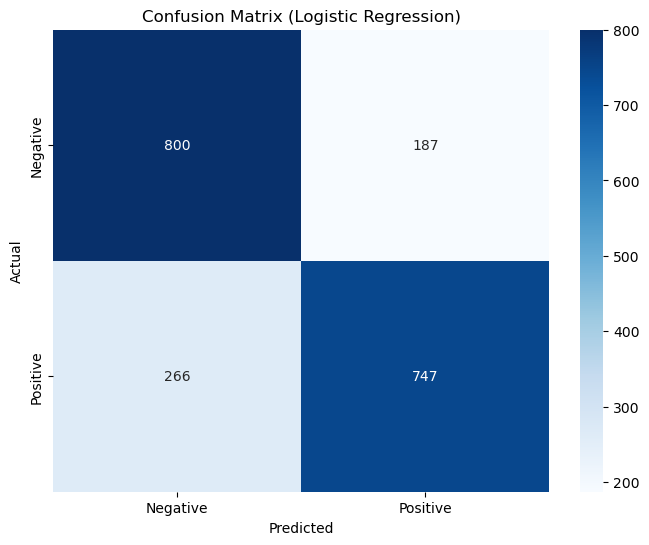

In [61]:
conf_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Bayes (Snowball Stemming) Method

In [1]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import twitter_samples

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
tweets = positive_tweets + negative_tweets
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))

In [5]:
df = pd.DataFrame({'tweets': tweets, 'labels': labels})

In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum()]
    return ' '.join(stemmed_tokens)

df['processed_tweets'] = df['tweets'].apply(preprocess_text)

In [40]:
print("\nProcessed Tweets:")
print(df['processed_tweets'].head(15))


Processed Tweets:
0     i love you how but you taecyeon2pm8 did you fe...
1        mayusushita sonalp2591 armansushita8 thank guy
2       your love o lord is better than life lt 3 https
3     yasminyasir96 yeah but it will be better if we...
4     ok good night i wish troy was ugli and i met h...
5     scottybev i not surpris that sound hellish whi...
6     dri hot scorch summer ff infocffm mediationmk ...
7                                hanbin sad pray for me
8                                         popol day too
9     my song of the week is ducktail surreal exposu...
10        i have no interest in speak to you ever again
11    caylahhhh lmfao serious i ca rememb if i did h...
12    should have taken a pic befor mrs wong confisc...
13      kianeganwl aarww i wish i could be there too xx
14    theprincesszooz but i see what you go at yes s...
Name: processed_tweets, dtype: object


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweets'], df['labels'], test_size=0.2, random_state=42)

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
nb_predictions = nb_model.predict(X_test_tfidf)

In [12]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

In [13]:
print(f"Accuracy (Naive Bayes): {nb_accuracy:.4f}\n")
print("Classification Report (Naive Bayes):")
print(nb_report)

Accuracy (Naive Bayes): 0.7610

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77       987
         1.0       0.80      0.71      0.75      1013

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

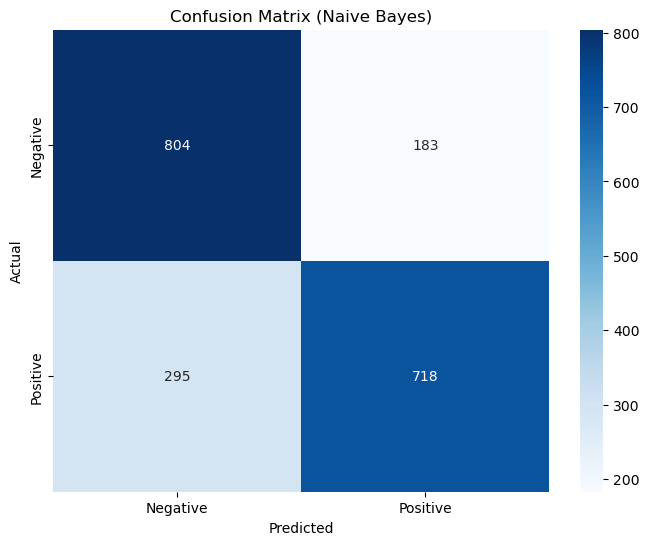

In [15]:
#confusion matrix
conf_mat_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier(Snowball Stemming) Method

In [42]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import twitter_samples

In [43]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [44]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [45]:
tweets = positive_tweets + negative_tweets
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))

In [46]:
df = pd.DataFrame({'tweets': tweets, 'labels': labels})

In [47]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [48]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum()]
    return ' '.join(stemmed_tokens)

df['processed_tweets'] = df['tweets'].apply(preprocess_text)

In [49]:
print("\nProcessed Tweets:")
print(df['processed_tweets'].head(15))


Processed Tweets:
0     i love you how but you taecyeon2pm8 did you fe...
1        mayusushita sonalp2591 armansushita8 thank guy
2       your love o lord is better than life lt 3 https
3     yasminyasir96 yeah but it will be better if we...
4     ok good night i wish troy was ugli and i met h...
5     scottybev i not surpris that sound hellish whi...
6     dri hot scorch summer ff infocffm mediationmk ...
7                                hanbin sad pray for me
8                                         popol day too
9     my song of the week is ducktail surreal exposu...
10        i have no interest in speak to you ever again
11    caylahhhh lmfao serious i ca rememb if i did h...
12    should have taken a pic befor mrs wong confisc...
13      kianeganwl aarww i wish i could be there too xx
14    theprincesszooz but i see what you go at yes s...
Name: processed_tweets, dtype: object


In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweets'], df['labels'], test_size=0.2, random_state=42)

In [52]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [54]:
rf_predictions = rf_model.predict(X_test_tfidf)

In [55]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

In [56]:
print(f"Accuracy (Random Forest): {rf_accuracy:.4f}\n")
print("Classification Report (Random Forest):")
print(rf_report)

Accuracy (Random Forest): 0.7625

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       987
         1.0       0.79      0.72      0.75      1013

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

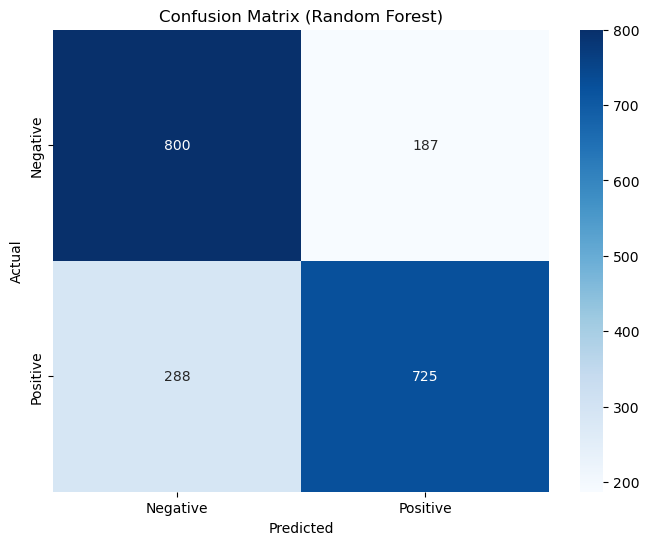

In [58]:
conf_mat_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()